# Iris Flower Classifcation

#### 1. Importing modules & analyzing dataset

In [63]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Importing dataset

In [64]:
Ir=pd.read_csv('Iris.csv')
Ir.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Analyzing Model

In [65]:
Ir=Ir.drop(columns = ['Id'])
Ir.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Statistics of dataset

In [66]:
Ir.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [67]:
# no of samples in each class
Ir['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [68]:
# check null values
Ir.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Graphs 

#### 1. Histograms 

<AxesSubplot:>

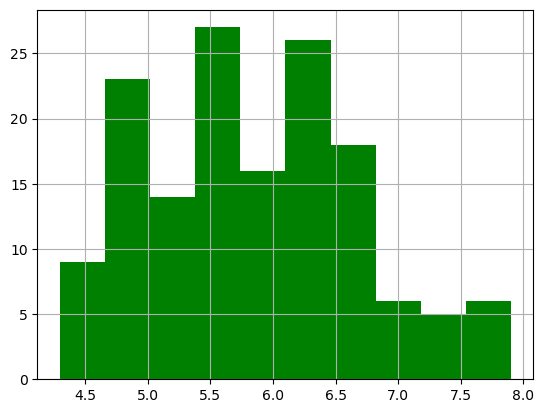

In [69]:
# sepal length
Ir['SepalLengthCm'].hist(color='GREEN')

<AxesSubplot:>

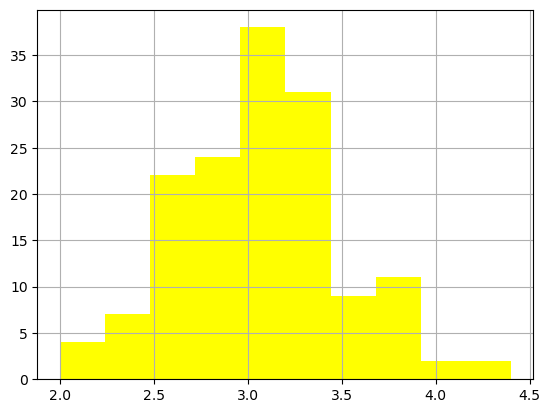

In [70]:
# sepal width
Ir['SepalWidthCm'].hist(color='YELLOW')

<AxesSubplot:>

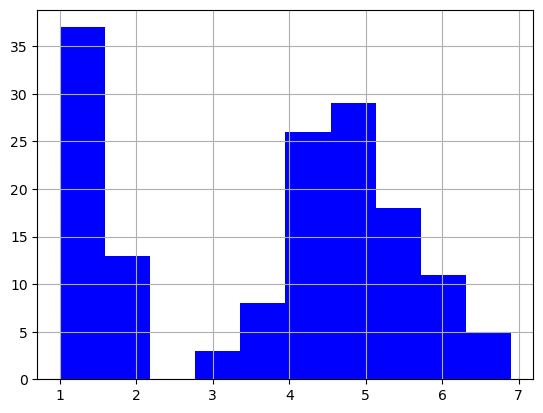

In [71]:
#petal length
Ir['PetalLengthCm'].hist(color='BLUE')

<AxesSubplot:>

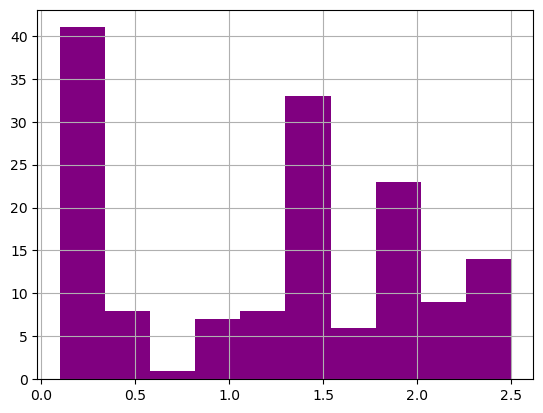

In [72]:
# petal width
Ir['PetalWidthCm'].hist(color='PURPLE')

#### 2. Scatter Plots

In [73]:
# Categorising data for scatter plot
colors=['yellow','green','purple']
Species= ['Iris-virginica','Iris-versicolor' , 'Iris-setosa']

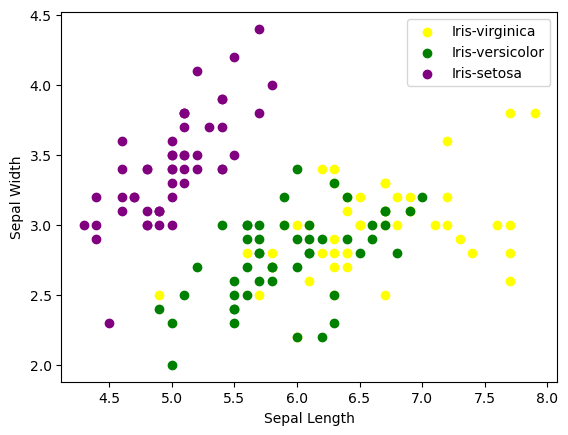

In [74]:
# sepal length vs sepal width
for i in range(3):
    x=Ir[Ir['Species']==Species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c=colors[i], label=Species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()    

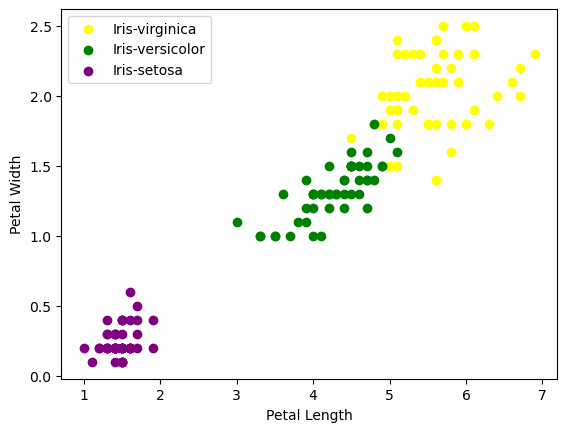

In [75]:
# petal length vs petal width
for i in range(3):
    x=Ir[Ir['Species']==Species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c=colors[i], label=Species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()    

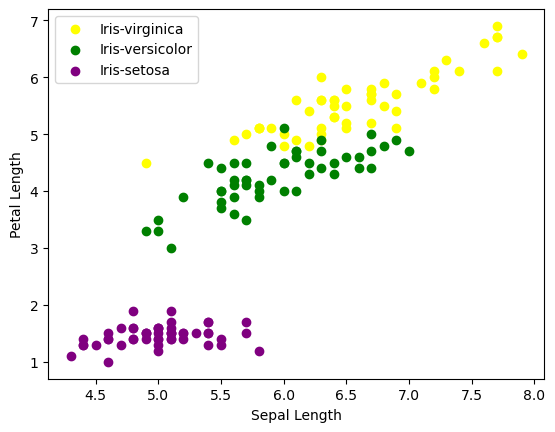

In [76]:
# sepal length vs petal length
for i in range(3):
    x=Ir[Ir['Species']==Species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'], c=colors[i], label=Species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()    

### Correlation

In [77]:
#correlation 
Ir.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

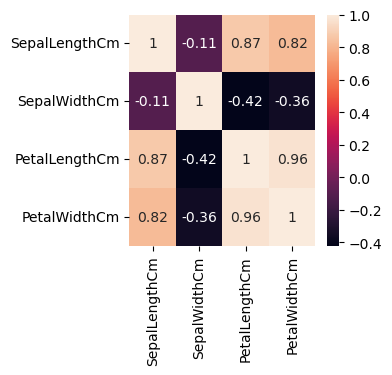

In [78]:
corr=Ir.corr()
fig, ax= plt.subplots(figsize=(3,3))
sns.heatmap(corr, annot=True, ax=ax)

In [79]:
#label encoder= convert data into machine understandable form
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [80]:
Ir['Species']= le.fit_transform(Ir['Species'])
Ir.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [81]:
from sklearn.model_selection import train_test_split
#train 60
#test 40
X = Ir.drop(columns=['Species'])
Y = Ir['Species']
x_train, x_test, y_train,y_test= train_test_split(X,Y, test_size=0.40)

### Logistic Regression 

In [82]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [83]:
model.fit(x_train, y_train)

LogisticRegression()

In [84]:
#print metric to get performance
print("Accuracy",model.score(x_test,y_test)*100)

Accuracy 98.33333333333333


In [85]:
# knn= k nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [86]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [87]:
print("Accuracy", model.score(x_test,y_test)*100)

Accuracy 98.33333333333333


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [88]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()

In [89]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [90]:
print("Accuracy", model.score(x_test,y_test)*100)

Accuracy 98.33333333333333
